# Simply Supported Beam subjected to Linearly Varying Load

## Objective
Design, develop and test a Python program to analyse a simply supported beam subjcted to linearly varying load applied over the entire span. The program should calculate the support reactions, SF and BM at regular intervals along the span, point of zero shear and maximum bending moment.

## Theory
<img src='example_civil.png'>

The equations for reactions at supports, intensity of load ($w_x$), sfear force ($V_x$) and bending moment ($M_x$) at a distance $x$ from left support are as shown below:

$$
\begin{align}
R_a &= \left( 2 w_1 + w_2 \right) \frac{L}{6} \\
R_b &= \left( w_1 + 2 w_2 \right) \frac{L}{6} \\
w_x &= w_1 + \frac{w_2 - w_1}{L} x \\
V_x &= R_a - \frac{w_1 + w_x}{2} x \\
M_x &= R_a x - \frac{w_1 + w_x}{2} x \cdot \frac{2 w_1 + w_x}{w_1 + w_x} \frac{x}{3} = R_a x - (2 w_1 + w_x) \frac{x^2}{6}
\end{align}$$

It can be seen that when the intensity of load $w_x$ varies linearly with $x$, variation of $V_x$ and $M_x$ with respect to $x$ is parabolic and cubic, respectively.

## Input Data
The primary input data are:
1. **Span $L$** in metres
2. **Intensity of load at left support $w_1$** in kN/m
3. **Intensity of load at right support $w_2$** in kN/m
4. **Number of equal intervals along span** at which shear force and bending moment are to be calculated

## Output Data
1. Shear force at regular intervals
2. Bending moment at regular intervals

## Other Data and Sign Convention
1. Distance $x$ of a chosen cross section from left support is positive when measured to the right of left support and $0 \leq x \leq L$
2. Intensity of load $w_1, w_2, w_x$ are positive when acting downwards.
3. Reactions at supports $R_a, R_b$ are positive when acting upwards.
4. Shear force $V_x$ is positive when net force on left of section is upwards or when net force to the right of section is downwards. Negative otherwise.
5. Bending moment $M_x$ is positive when bending moment is sagging and negative if hogging.

## Program Organization
We will develop functions to calculate each of these results, namely, reactions, intensity of load, sgear force and bending moment, as follows:

<table>
<tr>
<td>Function Name</td><td>Input Data</td><td>Output Data</td><td>Purpose</td>
</tr>
<tr>
<td>**`reactions()`**</td><td>$L$, $w_1$, $w_2$</td><td>$R_a, R_b$</td><td>Calculate reactions at supports</td>
</tr>
<tr>
<td>**`calc_wx()`**</td><td>$x$, $L$, $w_1$, $w_2$</td><td>$w_x$</td><td>Calculate intensity of load at $x$</td>
</tr>
<tr>
<td>**`calc_Vx()`**</td><td>$x$, $L$, $w_1$, $w_2$</td><td>$V_x$</td><td>Calculate shear force at $x$</td>
</tr>
<tr>
<td>**`calc_Mx()`**</td><td>$x$, $L$, $w_1$, $w_2$</td><td>$M_x$</td><td>Calculate bending moment at $x$</td>
</tr>
</table>

The function to calculate the reactions uses the above equations is shown below. It is tested for different types of input, namely, UDL ($w_1 = w_2$), triangular loads ($w_1 = 0$ and $w_2 = 0$).

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def reactions(L, w1, w2):
    '''Returns the reactions at left and right supports of a simply supported beam
       subjected to a linearly varying load with intensity w1 and w2 at the left and right
       ends, respectively'''
    Ra = (2 * w1 + w2) * L / 6
    Rb = (w1 + 2 * w2) * L / 6
    return (Ra, Rb)

Ra, Rb = reactions(6, 10, 10)
print(Ra, Rb)

Ra, Rb = reactions(6, 0, 30)
print(Ra, Rb)

Ra, Rb = reactions(6, 30, 0)
print(Ra, Rb)

help(reactions)

30.0 30.0
30.0 60.0
60.0 30.0
Help on function reactions in module __main__:

reactions(L, w1, w2)
    Returns the reactions at left and right supports of a simply supported beam
    subjected to a linearly varying load with intensity w1 and w2 at the left and right
    ends, respectively



Function to calculate intensity of load $w_x$ at distance $x$ from left support is shown below. It is tested for the intensity of load at midspan of a $6~m$ span beam with triangular loading ($w_1 = 0$) and UDL ($w_1 = w_2$).

In [2]:
def calc_wx(x, L, w1, w2):
    '''Returns the intensity of a linearly varying load at distance 'x' from left support
       when intensity at x=0 is w1 and at x=L is w2'''
    return w1 + (w2 - w1) * x / L

print(calc_wx(3, 6, 0, 20))
print(calc_wx(3, 6, 10, 10))

help(calc_wx)

x = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
wx = calc_wx(x, 6.0, 0.0, 12.0)
print(type(x), len(x))
print(type(wx), len(wx))
print(wx)

10.0
10.0
Help on function calc_wx in module __main__:

calc_wx(x, L, w1, w2)
    Returns the intensity of a linearly varying load at distance 'x' from left support
    when intensity at x=0 is w1 and at x=L is w2

<type 'numpy.ndarray'> 7
<type 'numpy.ndarray'> 7
[  0.   2.   4.   6.   8.  10.  12.]


Functions to calculate shear force $V_x$ and bending moment $M_x$ at $x$ are shown below. They are tested for 13 data points spaced equally along the span. Graphs of $w_x, V_x$ and $M_x$ are plotted and verified for the nature of their variation.

Ra = 12.0000, Rb = 24.0000
    0.00       0.0000      12.0000       0.0000
    0.50       1.0000      11.7500       5.9583
    1.00       2.0000      11.0000      11.6667
    1.50       3.0000       9.7500      16.8750
    2.00       4.0000       8.0000      21.3333
    2.50       5.0000       5.7500      24.7917
    3.00       6.0000       3.0000      27.0000
    3.50       7.0000      -0.2500      27.7083
    4.00       8.0000      -4.0000      26.6667
    4.50       9.0000      -8.2500      23.6250
    5.00      10.0000     -13.0000      18.3333
    5.50      11.0000     -18.2500      10.5417
    6.00      12.0000     -24.0000       0.0000


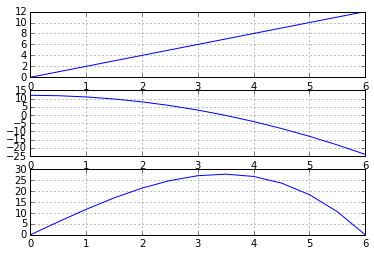

In [3]:
def calc_Vx(x, L, w1, w2):
    '''Returns the shear force at a distance 'x' from left support in a simply supported beam
       of span L subjected to a linearly varying load of intensity w1 at x=0 and w2 at x=L'''

    Ra, Rb = reactions(L, w1, w2)
    return (Ra  - (w1 + calc_wx(x, L, w1, w2)) / 2 * x)

def calc_Mx(x, L, w1, w2):
    '''Returns the bending moment at a distance 'x' from left support in a simply supported beam
       of span L subjected to a linearly varying load of intensity w1 at x=0 and w2 at x=L'''
    Ra, Rb = reactions(L, w1, w2)
    wx = calc_wx(x, L, w1, w2)
    return (Ra * x - (2*w1+wx)*x*x/6)

L = 6.0
w1 = 0.0
w2 = 12.0
numint = 12

Ra, Rb = reactions(L, w1, w2)
print('Ra = %.4f, Rb = %.4f' % (Ra, Rb))

x = np.linspace(0, L, numint+1)
wx = calc_wx(x, 6.0, w1, w2)
Vx = calc_Vx(x, L, w1, w2)
Mx = calc_Mx(x, L, w1, w2)

for xx, yy, zz, mm in zip(x, wx, Vx, Mx):
    print("%8.2f %12.4f %12.4f %12.4f" % (xx, yy, zz, mm))

plt.subplot(311)
plt.plot(x, wx)
plt.grid()

plt.subplot(312)
plt.plot(x, Vx)
plt.grid()

plt.subplot(313)
plt.plot(x, Mx)
plt.grid()

plt.show()

We must now determine the value of $x$ at which $V_x = 0$. This requires the calculation of root of the shear force equation. To achieve this, we will write two functions **`bracket()`** and **`false_pos()`** which will accomplish the following tasks, which are general in that they can be used in other problems which require finding of roots.

**`bracket()`** takes as input two vectors, namely the values of the independent variable $x$ and the corresponding dependent variable $y$. It returs **`None`** if no roots are bracketed else it returns the first brackets if a root is bracketed

**`false_pos()`** takes as input the function $f(x, L, w_1, w_2)$ whose roots are to be found, the brackets $x_1$, $x_2$, tolerance and the maximum number of iterations desired.

The function **`false_pos()`** is tested and verified by calculating shear force at the distance calculated by **`false_pos()`**, which must be zero, subjected to the chosen tolerance. Once verified, we can calculate the bending moment at the same location.

In [4]:
def bracket(x, y):
    '''Returns an List with two elements corresponding to the first root that is bracketed 
       within the array x[], else returns None'''
    
    b = []
    for i in range(len(x)-1):
        if y[i] * y[i+1] <= 0.0:
            b.append(x[i])
            b.append(x[i+1])
            return b
    return None

print(type(x), len(x))
b = bracket(x, Vx)
print(b)

<type 'numpy.ndarray'> 13
[3.0, 3.5]


In [5]:
def bisection(f, x1, x2, L, w1, w2, tol=1e-6, maxiter=50):
    '''Returns the root within the bracket [x1, x2] using Bisection method. Convergence is determined
       by the tolerance 'tol', which defaults to 1e-6 if not specified. A maximum of 'maxiter' iterations 
       are performed, which defaults to 50 if not specified. If no root with the required tolerance can be 
       found within the specified number of iterations, function returns None
       
       When calling this function, keyword arguments 'L', 'w1' and 'w2' must be supplied, which in turn will 
       be passed on to function 'f', whose root is being determined.'''

    y1 = f(x1, L, w1, w2)
    y2 = f(x2, L, w1, w2)
    if abs(y1) <= tol:
        return x1
    elif abs(y2) <= tol:
        return x2

    if (y1 * y2) > 0:
        print('Root not bracketed')
        return None

    k = 0
    while (k <= maxiter):
        k += 1
        x = (x1 + x2) / 2
        y = f(x, L, w1, w2)
        if abs(y) <= tol:
            return x
        else:
            if y1 * y < 0:
                x2 = x
                y2 = y
            else:
                x1 = x
                y1 = y

    if abs(y1) <= tol:
        return(x1)
    elif abs(y2) <= tol:
        return x2
    else:
        return None

x = bisection(calc_Vx, b[0],  b[1], 6.0, 0.0, 12.0, 1e-12)
print(x, calc_Vx(x, L, w1, w2))

help(bisection)

3.46410161514 5.24025267623e-13
Help on function bisection in module __main__:

bisection(f, x1, x2, L, w1, w2, tol=1e-06, maxiter=50)
    Returns the root within the bracket [x1, x2] using Bisection method. Convergence is determined
    by the tolerance 'tol', which defaults to 1e-6 if not specified. A maximum of 'maxiter' iterations 
    are performed, which defaults to 50 if not specified. If no root with the required tolerance can be 
    found within the specified number of iterations, function returns None
    
    When calling this function, keyword arguments 'L', 'w1' and 'w2' must be supplied, which in turn will 
    be passed on to function 'f', whose root is being determined.



In [6]:
print(calc_Mx(x, L, w1, w2))

27.7128129211


Once each function is tested, we can now write the main function that will set up the input data, call the required functions in the correct sequence and print the results. A separate function is developed to plot graphs.

INPUT
Span = 6.0000 m
Intensity of load at left support  = 0.0000 kN/m
Intensity of load at right support = 12.0000 kN/m

OUTPUT
Reactions
Ra = 12.0000, Rb = 24.0000
    0.00       0.0000      12.0000       0.0000
    0.46       0.9231      11.7870       5.5057
    0.92       1.8462      11.1479      10.8147
    1.38       2.7692      10.0828      15.7305
    1.85       3.6923       8.5917      20.0564
    2.31       4.6154       6.6746      23.5958
    2.77       5.5385       4.3314      26.1520
    3.23       6.4615       1.5621      27.5284
    3.69       7.3846      -1.6331      27.5284
    4.15       8.3077      -5.2544      25.9554
    4.62       9.2308      -9.3018      22.6127
    5.08      10.1538     -13.7751      17.3036
    5.54      11.0769     -18.6746       9.8316
    6.00      12.0000     -24.0000       0.0000


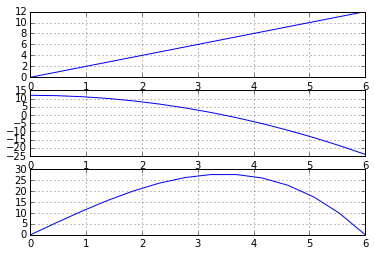

Maximum Bending Moment
x = 3.4641 V = -0.0000 Mmax = 27.7128


In [7]:
def plot_graphs(x, wx, Vx, Mx):
    '''Function to plot graphs for intensity of load, shear force and bending moment. Does not return any value.'''

    plt.subplot(311)
    plt.plot(x, wx)
    plt.grid()

    plt.subplot(312)
    plt.plot(x, Vx)
    plt.grid()

    plt.subplot(313)
    plt.plot(x, Mx)
    plt.grid()

    plt.show()
    return

def main(L, w1, w2, numint):
    '''Main function that sets up input, prints output and generates graphs. Does not return any value'''

    Ra, Rb = reactions(L, w1, w2)
    print('INPUT')
    print('Span = %.4f m' % L)
    print('Intensity of load at left support  = %.4f kN/m' % w1)
    print('Intensity of load at right support = %.4f kN/m' % w2)
    print()
    print('OUTPUT')
    print('Reactions')
    print('Ra = %.4f, Rb = %.4f' % (Ra, Rb))
    x = np.linspace(0.0, L, numint+1)
    wx = calc_wx(x, L, w1, w2)
    Vx = calc_Vx(x, L, w1, w2)
    Mx = calc_Mx(x, L, w1, w2)
    for xx, ww, sf, bm in zip(x, wx, Vx, Mx):
        print("%8.2f %12.4f %12.4f %12.4f" % (xx, ww, sf, bm))
    plot_graphs(x, wx, Vx, Mx)
    b = bracket(x, Vx)
    xmax = bisection(calc_Vx, b[0], b[1], L, w1, w2, 1e-12)
    Mmax = calc_Mx(xmax, L, w1, w2)
    print('Maximum Bending Moment')
    print('x = %.4f V = %.4f Mmax = %.4f' % (xmax, calc_Vx(xmax, L, w1, w2), calc_Mx(xmax, L, w1, w2)))
    return

L = 6.0
w1 = 0.0
w2 = 12.0
main(L, w1, w2, 13)

INPUT
Span = 6.0000 m
Intensity of load at left support  = 10.0000 kN/m
Intensity of load at right support = 10.0000 kN/m

OUTPUT
Reactions
Ra = 30.0000, Rb = 30.0000
    0.00      10.0000      30.0000       0.0000
    0.46      10.0000      25.3846      12.7811
    0.92      10.0000      20.7692      23.4320
    1.38      10.0000      16.1538      31.9527
    1.85      10.0000      11.5385      38.3432
    2.31      10.0000       6.9231      42.6036
    2.77      10.0000       2.3077      44.7337
    3.23      10.0000      -2.3077      44.7337
    3.69      10.0000      -6.9231      42.6036
    4.15      10.0000     -11.5385      38.3432
    4.62      10.0000     -16.1538      31.9527
    5.08      10.0000     -20.7692      23.4320
    5.54      10.0000     -25.3846      12.7811
    6.00      10.0000     -30.0000       0.0000


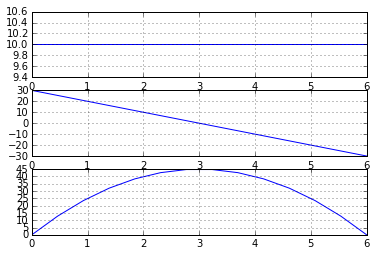

Maximum Bending Moment
x = 3.0000 V = 0.0000 Mmax = 45.0000


In [8]:
L = 6.0
w1 = 10.0
w2 = 10.0
main(L, w1, w2, 13)

INPUT
Span = 6.0000 m
Intensity of load at left support  = 12.0000 kN/m
Intensity of load at right support = 0.0000 kN/m

OUTPUT
Reactions
Ra = 24.0000, Rb = 12.0000
    0.00      12.0000      24.0000       0.0000
    0.46      11.0769      18.6746       9.8316
    0.92      10.1538      13.7751      17.3036
    1.38       9.2308       9.3018      22.6127
    1.85       8.3077       5.2544      25.9554
    2.31       7.3846       1.6331      27.5284
    2.77       6.4615      -1.5621      27.5284
    3.23       5.5385      -4.3314      26.1520
    3.69       4.6154      -6.6746      23.5958
    4.15       3.6923      -8.5917      20.0564
    4.62       2.7692     -10.0828      15.7305
    5.08       1.8462     -11.1479      10.8147
    5.54       0.9231     -11.7870       5.5057
    6.00       0.0000     -12.0000       0.0000


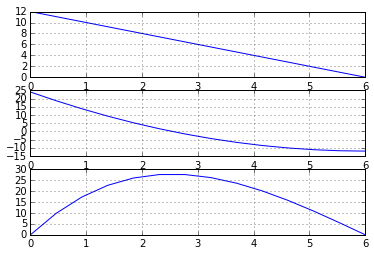

Maximum Bending Moment
x = 2.5359 V = 0.0000 Mmax = 27.7128


In [9]:
L = 6.0
w1 = 12.0
w2 = 0.0
main(L, w1, w2, 13)

## Results and Discussion
* Discuss the results for different types of loads that can be generated using this program, namely
  * Triangular load ($w_1=0, w_2 \neq 0$ or $w1 \neq 0, w_2=0$)
  * Unifomly distributed load ($w_1 = w_2$)
  * Trapezoidal load ($w_1 \neq 0$ and $w_2 \neq 0$)
* A study on the effect of changing number of intervals could be made

## Limitations of the Program
The defined scope of the problem limits the program to simple supports, load applied over entire span and varying linearly from $w_1$ at left support to $w_2$ at the right support.

## Improvements to the Program
* Replacing Bisection with False Position method may reduce the number of iterations required.

## Conclusions

In [10]:
def bisection(f, x1, x2, L, w1, w2, tol, maxiter):
    y1 = f(x1, L, w1, w2)

    if abs(y1) <= tol:
        return x1

    y2 = f(x2, L, w1, w2)
    if abs(y2) <= tol:
        return x2
    k = 0
    while k <= maxiter:
        k += 1
        x = (x1 + x2) / 2
        y = f(x, L, w1, w2)
        # print(x, y)
        if abs(y) <= tol:
            return x
        if y1 * y <= 0.0:  # Root is bracketed by left half
            x2 = x
            y2 = y
        else: # Root is bracketed by right half
            x1 = x
            y1 = y
    return None
root = bisection(calc_Vx, 3.0, 3.5, 6, 0, 12, 1e-6, 50)
Vmax = calc_Vx(root, 6, 0, 12)
Mmax = calc_Mx(root, 6, 0, 12)
print(root, Vmax, Mmax)
print()
root = bisection(calc_Vx, 3.0, 3.5, 6, 0, 12, 1e-12, 50)
Vmax = calc_Vx(root, 6, 0, 12)
Mmax = calc_Mx(root, 6, 0, 12)
print(root, Vmax, Mmax)
print()
root = bisection(calc_Vx, 3.0, 3.5, 6, 0, 12, 1e-16, 50)
Vmax = calc_Vx(root, 6, 0, 12)
Mmax = calc_Mx(root, 6, 0, 12)
print(root, Vmax, Mmax)

3.46410155296 4.30757552294e-07 27.7128129211

3.46410161514 5.24025267623e-13 27.7128129211

3.46410161514 0.0 27.7128129211


Simply Supported Beam, Span = 6.00
Ra = 30.00, Rb = 30.00
[ 30.  25.  20.  15.  10.   5.   0.  -5. -10. -15. -20. -25. -30.]
[  0.    13.75  25.    33.75  40.    43.75  45.    43.75  40.    33.75  25.
  13.75   0.  ]


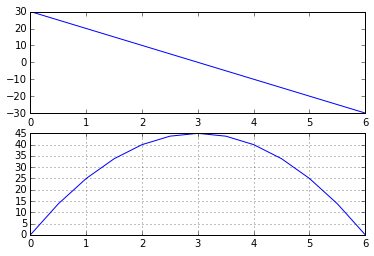

In [34]:
class UDL(object):
    def __init__(self, w, d1, d2):
        self.w = w
        if d2 > d1:
            self.d1 = d1
            self.d2 = d2
        else:
            seld.d1 = d2
            self.d2 = d1
        return

    def getResultant(self):
        return self.w * (self.d2 - self.d1)

    def getCG(self):
        return (self.d1 + self.d2) / 2.0

    def getMagnitude(self):
        return self.getResultant()

    def getMoment(self):
        return self.getResultant() * self.getCG()

    def calcV(self, x):
        if x <= self.d1:
            return 0.0
        elif x <= self.d2:
            return -(self.w * (x - self.d1))
        else:
            return -self.getResultant()

    def calcM(self, x):
        if x <= self.d1:
            return 0.0
        elif x <= self.d2:
            return -(self.w * (x - self.d1)**2 / 2.0)
        else:
            return -(self.getResultant() * (x - self.getCG()))

class SSBeam(object):
    def __init__(self, L, loads, ndiv=10):
        self.L = L
        self.loads = loads[:]
        self.ndiv = ndiv
        self.sections = np.linspace(0, self.L, self.ndiv+1)
        self.V = np.zeros(self.sections.shape)
        self.M = np.zeros(self.sections.shape)
        return

    def getSections(self):
        self.sections = np.linspace(0, self.L, self.ndiv+1)
        return

    def __str__(self):
        s = "Simply Supported Beam, Span = %.2f" % (self.L,)
        return s

    def calcReactions(self):
        P = 0.0
        M = 0.0
        for load in self.loads:
            P += load.getMagnitude()
            M += load.getMoment()
        Rb = M / self.L
        Ra = P - Rb
        return (Ra, Rb)

    def calcV_M(self):
        Ra, Rb = self.calcReactions()
        for i, x in enumerate(self.sections):
            V = Ra
            M = Ra * x
            for load in self.loads:
                V += load.calcV(x)
                M += load.calcM(x)
            self.V[i] = V
            self.M[i] = M
        print(self.V)
        print(self.M)
        return

    def plot(self):
        plt.subplot(211)
        plt.plot(self.sections, self.V)
        plt.subplot(212)
        plt.plot(self.sections, self.M)
        plt.grid()
        plt.show()
        return

loads = [UDL(10.0, 0.0, 6.0)]
B = SSBeam(6, loads, 12)
print(B)
Ra, Rb = B.calcReactions()
print("Ra = %.2f, Rb = %.2f" % (Ra, Rb))
B.calcV_M()
B.plot()